For reproducability

In [1]:
import os
import random
import numpy as np
import tensorflow as tf

# Reproducibility settings
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
tf.config.experimental.enable_op_determinism()

## Visualization of Dataset

In [2]:
from Functions import load_realwaste_dataset
data_dir = "../realwaste-main/RealWaste"

X_train, X_test, y_train, y_test, class_names = load_realwaste_dataset(
    data_dir=data_dir,
    img_size=(128, 128),  
    test_size=0.2,        
    random_state=42,
    grayscale=False       
)

Loading images from dataset...
Loading 461 images from Cardboard...
Loading 411 images from Food Organics...
Loading 420 images from Glass...
Loading 790 images from Metal...
Loading 495 images from Miscellaneous Trash...
Loading 500 images from Paper...
Loading 921 images from Plastic...
Loading 318 images from Textile Trash...
Loading 436 images from Vegetation...

Dataset loaded:
Total images: 4752
Image shape: (128, 128, 3)
Number of classes: 9

Class distribution:
  Cardboard: 461 images
  Food Organics: 411 images
  Glass: 420 images
  Metal: 790 images
  Miscellaneous Trash: 495 images
  Paper: 500 images
  Plastic: 921 images
  Textile Trash: 318 images
  Vegetation: 436 images

Train set: 3801 images
Test set: 951 images

Train set class distribution:
  Cardboard: 369 images (9.7%)
  Food Organics: 329 images (8.7%)
  Glass: 336 images (8.8%)
  Metal: 632 images (16.6%)
  Miscellaneous Trash: 396 images (10.4%)
  Paper: 400 images (10.5%)
  Plastic: 736 images (19.4%)
  Textil

In [12]:
class_names

['Cardboard',
 'Food Organics',
 'Glass',
 'Metal',
 'Miscellaneous Trash',
 'Paper',
 'Plastic',
 'Textile Trash',
 'Vegetation']

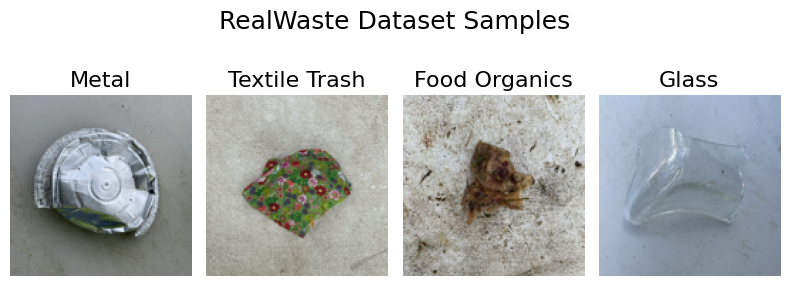

In [16]:
import matplotlib.pyplot as plt
num_classes = len(class_names)

# Create a figure with rows=num_classes and cols=samples_per_class
fig, axes = plt.subplots(1, 4, figsize=(8, 3))
plt.suptitle("RealWaste Dataset Samples", fontsize=18, y=1.02)

for i in range(10,14):
    ax = axes[i-10]
    img = X_train[i]
    label = class_names[y_train[i]]
    
    # Fix for grayscale channel if present (removes the last dimension)
    if img.ndim == 3 and img.shape[-1] == 1:
        img = img.squeeze()
        ax.imshow(img, cmap='gray')
    else:
        ax.imshow(img)
        
    ax.set_title(label, fontsize=16)
    ax.axis('off')
        
plt.tight_layout()
plt.savefig("ExampleImages.png", bbox_inches='tight')
plt.show()

#### Visualization of the percentage distribution

### Visualization of the augmented image

In [17]:
from Functions import augment_training_data
X_aug, y_aug = augment_training_data(X_train[2:3],y_train[2:3])

# Original image not needed in the Visualization
X_aug = np.delete(X_aug, 0, axis=0)

training set size:  1
Starting data augmentation...
Augmentation complete. Final training set size: 6


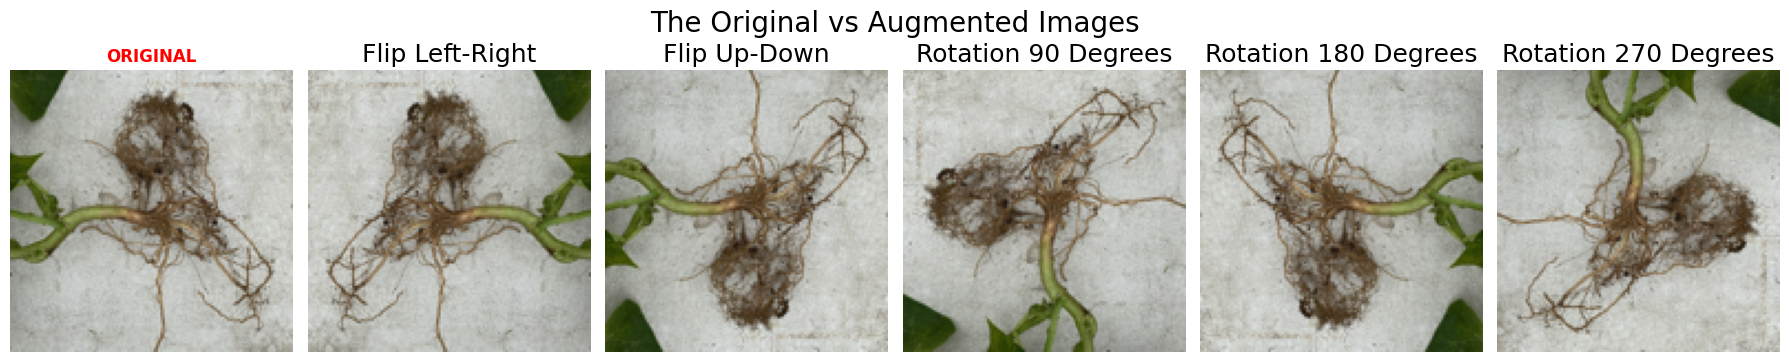

In [28]:

fig, axes = plt.subplots(1, 6, figsize=(18, 4))
plt.suptitle("The Original vs Augmented Images", fontsize=20, y=0.95)

ax = axes[0]
img_orig = X_train[2]  
label = class_names[y_train[2]]

# Handle grayscale
if img_orig.ndim == 3 and img_orig.shape[-1] == 1:
    ax.imshow(img_orig.squeeze(), cmap='gray')
else:
    ax.imshow(img_orig)

ax.set_title(f"ORIGINAL", fontweight='bold', color='red')
ax.axis('off')


# --- 2. Plot The 5 Augmented Images (The Rest) ---

AugmentationLabel = ["Flip Left-Right","Flip Up-Down","Rotation 90 Degrees","Rotation 180 Degrees", "Rotation 270 Degrees"] 

for i in range(5):
    ax = axes[i+1]     # Start at column 1 (since 0 is original)
    img_aug = X_aug[i] # Take the first 5 augmented images
    
    # Handle grayscale
    if img_aug.ndim == 3 and img_aug.shape[-1] == 1:
        ax.imshow(img_aug.squeeze(), cmap='gray')
    else:
        ax.imshow(img_aug)
        
    ax.set_title(f"{AugmentationLabel[i]}", fontsize=18)
    ax.axis('off')

plt.tight_layout()
plt.savefig("ExampleAugmentation.png")
plt.show()

In [16]:
from Functions import augment_training_data
X_aug, y_aug = augment_training_data(X_train,y_train)

training set size:  3801
Starting data augmentation...
Augmentation complete. Final training set size: 22806


## Visualization of Training the FFNN

Change parameter to grayscale to true and rerun for Black and white analysis

### Visualizing the Struggeling Basic FFNN

In [ ]:
from Functions import load_realwaste_dataset
data_dir = "../realwaste-main/RealWaste"
X_train, X_test, y_train, y_test, class_names = load_realwaste_dataset(
    data_dir=data_dir,
    img_size=(128, 128),  
    test_size=0.2,        
    random_state=42,
    grayscale=False       
)
class_names = [
        'Cardboard', 'Food Organics', 'Glass', 'Metal', 
        'Miscellaneous Trash', 'Paper', 'Plastic', 
        'Textile Trash', 'Vegetation'
    ]


Loading images from dataset...
Loading 461 images from Cardboard...
Loading 411 images from Food Organics...
Loading 420 images from Glass...
Loading 790 images from Metal...
Loading 495 images from Miscellaneous Trash...
Loading 500 images from Paper...
Loading 921 images from Plastic...
Loading 318 images from Textile Trash...
Loading 436 images from Vegetation...

Dataset loaded:
Total images: 4752
Image shape: (128, 128, 3)
Number of classes: 9

Class distribution:
  Cardboard: 461 images
  Food Organics: 411 images
  Glass: 420 images
  Metal: 790 images
  Miscellaneous Trash: 495 images
  Paper: 500 images
  Plastic: 921 images
  Textile Trash: 318 images
  Vegetation: 436 images

Train set: 3801 images
Test set: 951 images

Train set class distribution:
  Cardboard: 369 images (9.7%)
  Food Organics: 329 images (8.7%)
  Glass: 336 images (8.8%)
  Metal: 632 images (16.6%)
  Miscellaneous Trash: 396 images (10.4%)
  Paper: 400 images (10.5%)
  Plastic: 736 images (19.4%)
  Textil

Loading images from dataset...
Loading 461 images from Cardboard...
Loading 411 images from Food Organics...
Loading 420 images from Glass...
Loading 790 images from Metal...
Loading 495 images from Miscellaneous Trash...
Loading 500 images from Paper...
Loading 921 images from Plastic...
Loading 318 images from Textile Trash...
Loading 436 images from Vegetation...

Dataset loaded:
Total images: 4752
Image shape: (128, 128, 3)
Number of classes: 9

Class distribution:
  Cardboard: 461 images
  Food Organics: 411 images
  Glass: 420 images
  Metal: 790 images
  Miscellaneous Trash: 495 images
  Paper: 500 images
  Plastic: 921 images
  Textile Trash: 318 images
  Vegetation: 436 images

Train set: 3801 images
Test set: 951 images

Train set class distribution:
  Cardboard: 369 images (9.7%)
  Food Organics: 329 images (8.7%)
  Glass: 336 images (8.8%)
  Metal: 632 images (16.6%)
  Miscellaneous Trash: 396 images (10.4%)
  Paper: 400 images (10.5%)
  Plastic: 736 images (19.4%)
  Textil

In [3]:
from Functions import augment_training_data
X_aug, y_aug = augment_training_data(X_train,y_train)

training set size:  3801
Starting data augmentation...


Augmentation complete. Final training set size: 22806


In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers

def build_ffnn_model(input_shape, num_classes):
    """
    Builds a Feed-Forward Neural Network (Dense layers only).
    """
    model = models.Sequential([
        # FLATTEN LAYER: Critical for FFNN
        # Converts 2D/3D image (e.g., 64x64x3) into a 1D vector (length 12,288)
        layers.Flatten(input_shape=input_shape),

        # HIDDEN LAYER 1
        # High neuron count needed to capture complex patterns from raw pixels
        layers.Dense(1000, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
        #layers.Dropout(0.4), # Drop 40% to prevent memorization
        #1000,700,500,300
        # HIDDEN LAYER 2
        layers.Dense(700, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
        #layers.Dropout(0.3),

        # HIDDEN LAYER 3
        layers.Dense(500, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
        #layers.Dropout(0.2),
     
        # OUTPUT LAYER
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [32]:
input_shape = X_train.shape[1:] 
print(f"Building FFNN for input shape: {input_shape}")
# Build Model
model = build_ffnn_model(input_shape, len(class_names))
# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#model.summary()
# Train
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nFinal Test Accuracy: {accuracy*100:.2f}%")

Building FFNN for input shape: (128, 128, 3)


c:\Users\Anton\Documents\UiO Fag\FYS-STK4155 Anvendt dataanalyse og maskinlaring\Eget Arbeid\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 78s 631ms/step - accuracy: 0.1634 - loss: 3.2615 - val_accuracy: 0.1945 - val_loss: 2.6372
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 70s 592ms/step - accuracy: 0.1878 - loss: 2.4723 - val_accuracy: 0.1945 - val_loss: 2.3747
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 71s 594ms/step - accuracy: 0.1884 - loss: 2.3142 - val_accuracy: 0.1945 - val_loss: 2.2843
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 70s 591ms/step - accuracy: 0.1905 - loss: 2.2594 - val_accuracy: 0.0967 - val_loss: 2.2444
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 70s 588ms/step - accuracy: 0.1839 - loss: 2.2263 - val_accuracy: 0.1945 - val_loss: 2.2436
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 70s 587ms/step - accuracy: 0.1834 - loss: 2.2141 - val_accuracy: 0.1945 - val_loss: 2.2121
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 83s 588ms/step - accuracy: 0.1810 - loss: 2.2386 - val_accuracy: 0.1945 - val_loss: 2.2534
Epoch 8/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 70s 590ms/step - accuracy: 0.1876 - loss: 2

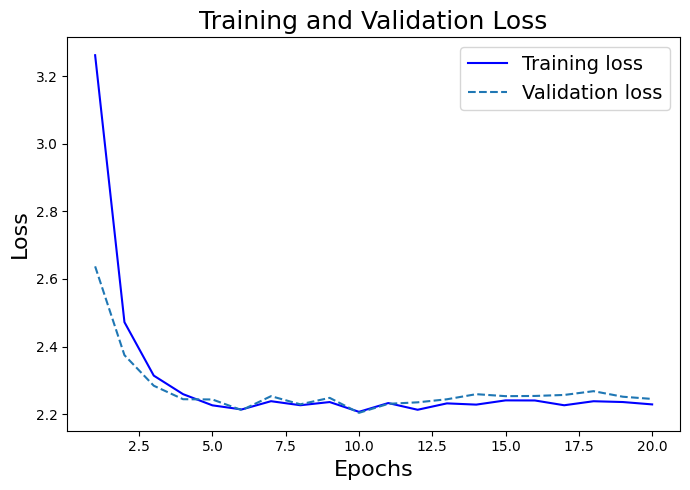

In [35]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))

# Plot training loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
# Plot validation loss
plt.plot(epochs, val_loss, '--', label='Validation loss')

plt.title('Training and Validation Loss', fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("Training_struggle_FFNN.png")
plt.show()

### Visualization of PCA

#### PCA for 95%

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95) 

print("Fitting PCA (this may take a moment)...")
X_train_pca = pca.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_pca = pca.transform(X_test.reshape(X_test.shape[0], -1))

print(f"Original Feature Count: {X_train.shape[1]*X_train.shape[2]*X_train.shape[3]}")
print(f"Reduced PCA Feature Count: {X_train_pca.shape[1]}")

Fitting PCA (this may take a moment)...
Original Feature Count: 49152
Reduced PCA Feature Count: 962


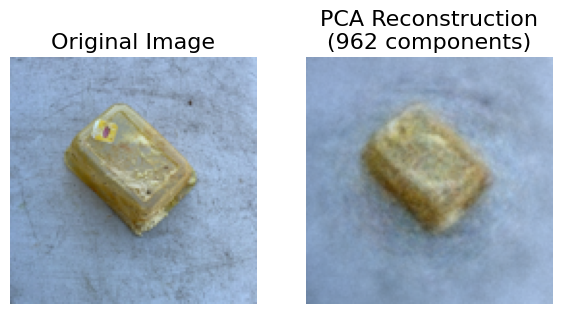

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_reconstruction(pca, X_original, img_shape=(128, 128, 3)):

    X_compressed = pca.transform(X_original.reshape(1, -1))
    
    X_reconstructed = pca.inverse_transform(X_compressed)
    X_reconstructed_img = X_reconstructed.reshape(img_shape)
    
    # Normalize for display
    X_reconstructed_img = np.clip(X_reconstructed_img, 0, 1) 
    
    # Plot side-by-side
    plt.figure(figsize=(7, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(X_original.reshape(img_shape))
    plt.title("Original Image", fontsize=16)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(X_reconstructed_img)
    plt.title(f"PCA Reconstruction\n({pca.n_components_} components)", fontsize=16)
    plt.axis('off')
    plt.savefig("PCA_Reconstruction.png")
    
    plt.show()

# Run on the first image from training set
plot_reconstruction(pca, X_train[50])

#### Training on non-augmented

In [116]:
from Functions import build_ffnn_model_PCA_optimal
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers

X_train_pca = pca.transform(X_train.reshape(X_train.shape[0], -1))
X_test_pca = pca.transform(X_test.reshape(X_test.shape[0], -1))

print(f"Building FFNN for input shape: {(X_train_pca.shape[1],1)}")
# Build Model
model = build_ffnn_model_PCA_optimal((X_train_pca.shape[1],1), len(class_names))
# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#model.summary()
# Train
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=4, 
    restore_best_weights=True
)
history = model.fit(
    X_train_pca, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test_pca, y_test),
    callbacks=[early_stopping]
)
# Evaluate
loss, accuracy = model.evaluate(X_test_pca, y_test)
print(f"\nFinal Test Accuracy: {accuracy*100:.2f}%")

Building FFNN for input shape: (962, 1)
Epoch 1/30


c:\Users\Anton\Documents\UiO Fag\FYS-STK4155 Anvendt dataanalyse og maskinlaring\Eget Arbeid\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.3047 - loss: 2.1479 - val_accuracy: 0.3943 - val_loss: 1.9215
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5051 - loss: 1.6396 - val_accuracy: 0.4448 - val_loss: 1.8586
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6101 - loss: 1.3659 - val_accuracy: 0.4627 - val_loss: 1.8325
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6840 - loss: 1.1941 - val_accuracy: 0.4648 - val_loss: 1.9477
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7295 - loss: 1.0767 - val_accuracy: 0.4290 - val_loss: 2.2621
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7803 - loss: 0.9694 - val_accuracy: 0.4290 - val_loss: 2.4105
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8122 - loss: 0.8790 - val_accuracy: 0.4469 - val_loss: 2.4639
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4627 - loss: 1.8325

Final Test Accuracy: 46.27%


##### Training Run for the AUG

In [5]:
X_aug_pca = pca.transform(X_aug.reshape(X_aug.shape[0], -1))
X_test_pca = pca.transform(X_test.reshape(X_test.shape[0], -1))

In [6]:
from Functions import build_ffnn_model_PCA_optimal
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers

print(f"Building FFNN for input shape: {(X_aug_pca.shape[1],1)}")
# Build Model
model = build_ffnn_model_PCA_optimal((X_aug_pca.shape[1],1), len(class_names))
# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#model.summary()
# Train
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=4, 
    restore_best_weights=True
)
history = model.fit(
    X_aug_pca, y_aug,
    epochs=30,
    batch_size=32,
    validation_data=(X_test_pca, y_test),
    callbacks=[early_stopping]
)
# Evaluate
loss, accuracy = model.evaluate(X_test_pca, y_test)
print(f"\nFinal Test Accuracy: {accuracy*100:.2f}%")

Building FFNN for input shape: (962, 1)


c:\Users\Anton\Documents\UiO Fag\FYS-STK4155 Anvendt dataanalyse og maskinlaring\Eget Arbeid\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.4146 - loss: 1.7855 - val_accuracy: 0.4837 - val_loss: 1.5848
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.5416 - loss: 1.4445 - val_accuracy: 0.5089 - val_loss: 1.5363
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.5934 - loss: 1.3243 - val_accuracy: 0.5184 - val_loss: 1.5532
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.6442 - loss: 1.2312 - val_accuracy: 0.5289 - val_loss: 1.5891
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.6885 - loss: 1.1485 - val_accuracy: 0.5384 - val_loss: 1.6573
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.7327 - loss: 1.0666 - val_accuracy: 0.5216 - val_loss: 1.7750
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5089 - loss: 1.5363

Final Test Accuracy: 50.89%


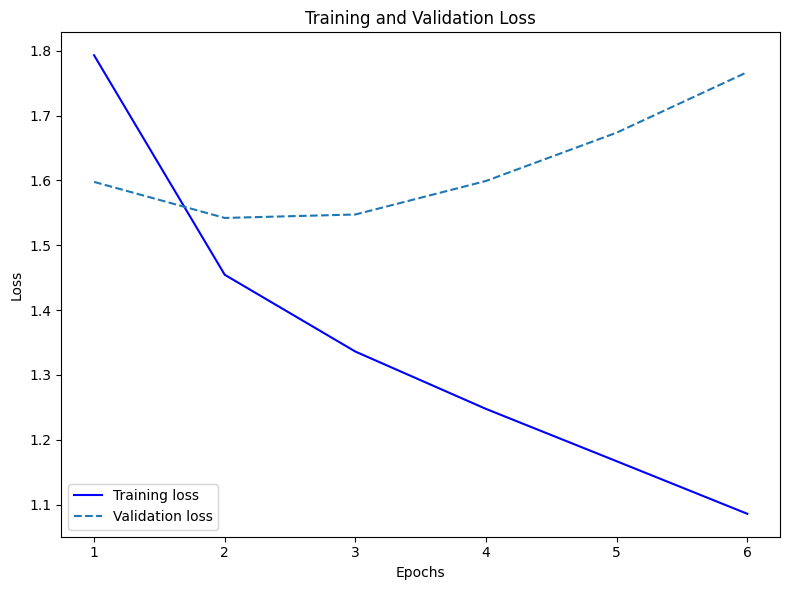

In [44]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Plot training loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
# Plot validation loss
plt.plot(epochs, val_loss, '--', label='Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig("Training_PCA_128_Aug_Optimal.png")
plt.show()

##### Confusion Graph

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


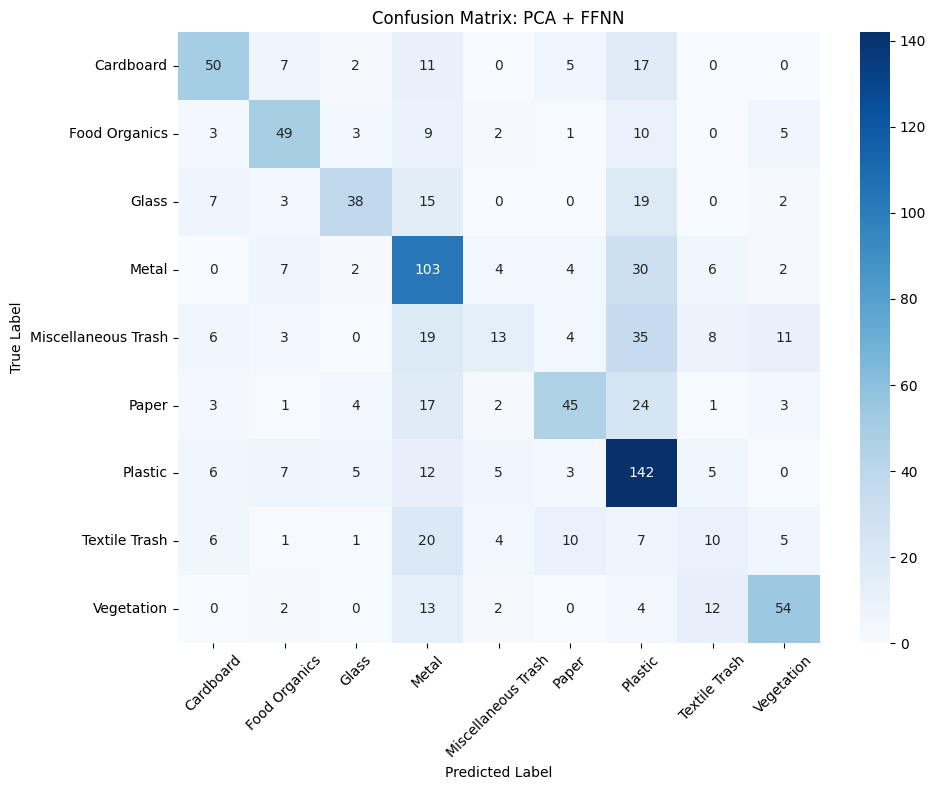

In [25]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_probs = model.predict(X_test_pca)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)


plt.figure(figsize=(10, 8))
sns.heatmap(
    cm, 
    annot=True,          
    fmt='d',             
    cmap='Blues',        
    xticklabels=class_names, 
    yticklabels=class_names  
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: PCA + FFNN')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Confusion_Matrix_PCA_FFNN_Aug.png")
plt.show()

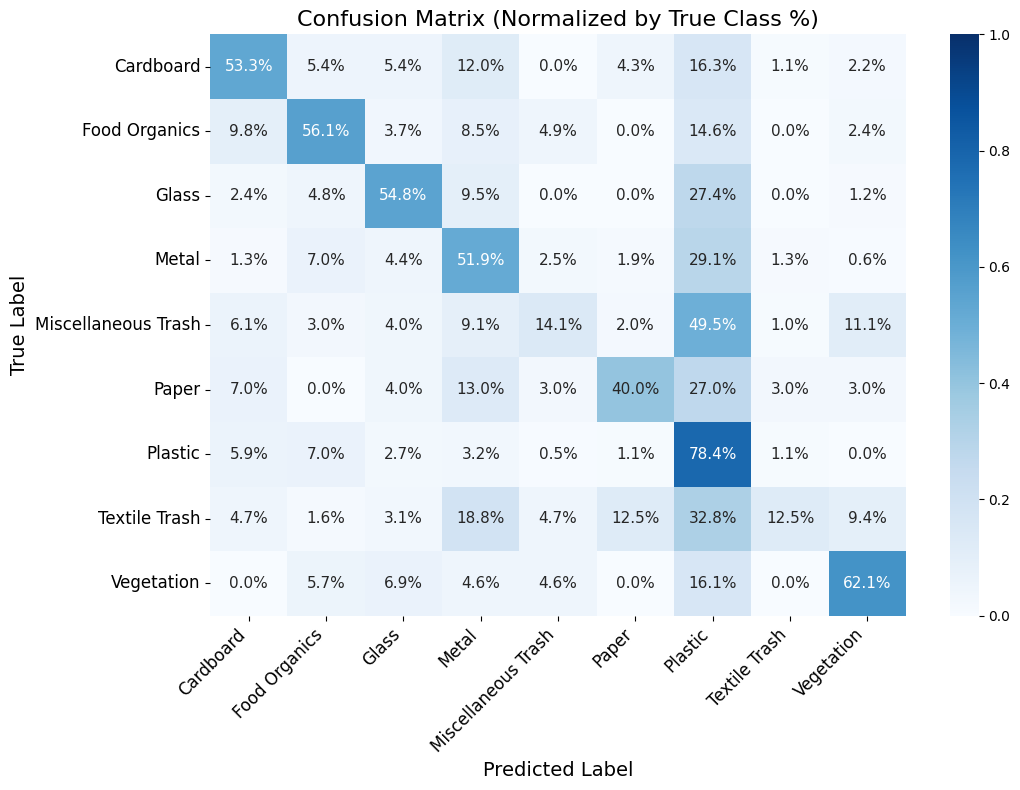

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_probs = model.predict(X_test_pca, verbose=0)
y_pred_classes = np.argmax(y_pred_probs, axis=1)


cm = confusion_matrix(y_test, y_pred_classes)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(11, 8))
sns.heatmap(
    cm_normalized,       # Use the normalized data
    annot=True,          # Show numbers
    fmt='.1%',           # Format as percentage with 1 decimal place (e.g., 85.2%)
    cmap='Blues',        # Color scheme
    xticklabels=class_names,
    yticklabels=class_names,
    vmin=0, vmax=1
    , annot_kws={"size": 11}  
)

plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix (Normalized by True Class %)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.savefig("Confusion_Matrix_PCA_FFNN_Aug.png")
plt.show()

#### Plotting the missclassifed images

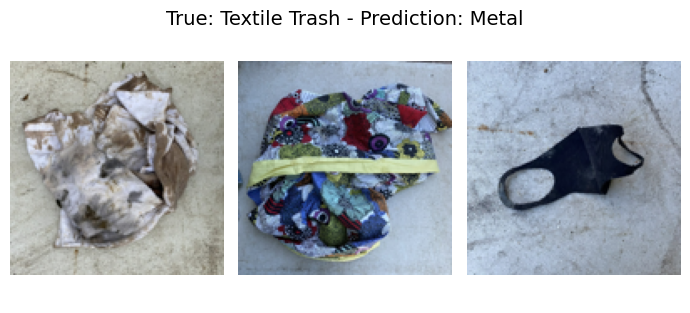

In [31]:
true_label = "Textile Trash"
pred_label = "Metal"


true_idx = class_names.index(true_label)
pred_idx = class_names.index(pred_label)

misclassified_indices = np.where(
    (y_test == true_idx) & (y_pred_classes == pred_idx)
)[0]

plt.figure(figsize=(7, 3))
plt.title(f"True: {true_label} - Prediction: {pred_label}", fontsize=14)
plt.axis('off')
for i in range(3):
    ax1 = plt.subplot(1, 3, i + 1)
    idx = misclassified_indices[i]
    img = X_test[idx]

    ax1.imshow(img)
    ax1.axis('off')

plt.savefig("Misclassified_Examples_FFNN_PCA_Aug.png")
plt.tight_layout()

plt.show()

#### PCA for 99%

In [86]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99) 

print("Fitting PCA (this may take a moment)...")
X_aug_pca = pca.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_pca = pca.transform(X_test.reshape(X_test.shape[0], -1))

print(f"Original Feature Count: {X_train.shape[1]*X_train.shape[2]*X_train.shape[3]}")
print(f"Reduced PCA Feature Count: {X_aug_pca.shape[1]}")


Fitting PCA (this may take a moment)...
Original Feature Count: 49152
Reduced PCA Feature Count: 2331


In [87]:
X_aug_pca = pca.transform(X_aug.reshape(X_aug.shape[0], -1))
X_test_pca = pca.transform(X_test.reshape(X_test.shape[0], -1))

In [88]:
from Functions import build_ffnn_model_PCA_optimal
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers

print(f"Building FFNN for input shape: {(X_aug_pca.shape[1],1)}")
# Build Model
model = build_ffnn_model_PCA_optimal((X_aug_pca.shape[1],1), len(class_names))
# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#model.summary()
# Train
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=4, 
    restore_best_weights=True
)
history = model.fit(
    X_aug_pca, y_aug,
    epochs=30,
    batch_size=32,
    validation_data=(X_test_pca, y_test),
    callbacks=[early_stopping]
)
# Evaluate
loss, accuracy = model.evaluate(X_test_pca, y_test)
print(f"\nFinal Test Accuracy: {accuracy*100:.2f}%")

Building FFNN for input shape: (2331, 1)


c:\Users\Anton\Documents\UiO Fag\FYS-STK4155 Anvendt dataanalyse og maskinlaring\Eget Arbeid\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 37s 40ms/step - accuracy: 0.4128 - loss: 1.8074 - val_accuracy: 0.4932 - val_loss: 1.6038
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.5410 - loss: 1.4677 - val_accuracy: 0.5016 - val_loss: 1.5764
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.5946 - loss: 1.3511 - val_accuracy: 0.5163 - val_loss: 1.6026
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.6458 - loss: 1.2601 - val_accuracy: 0.5258 - val_loss: 1.6583
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.6940 - loss: 1.1761 - val_accuracy: 0.5174 - val_loss: 1.7467
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.7448 - loss: 1.0921 - val_accuracy: 0.5268 - val_loss: 1.8557
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5016 - loss: 1.5764

Final Test Accuracy: 50.16%


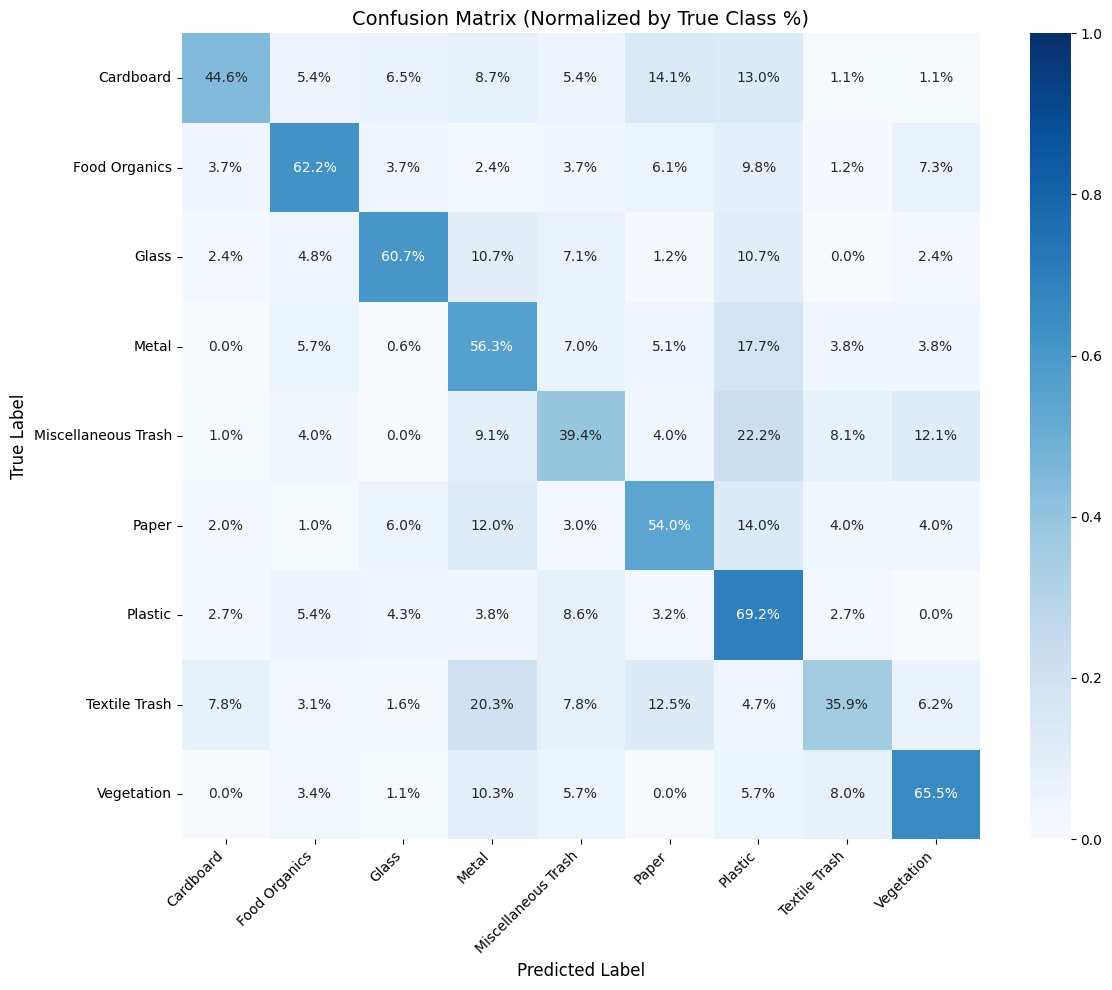

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_probs = model.predict(X_test_pca, verbose=0)
y_pred_classes = np.argmax(y_pred_probs, axis=1)


cm = confusion_matrix(y_test, y_pred_classes)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm_normalized,       # Use the normalized data
    annot=True,          # Show numbers
    fmt='.1%',           # Format as percentage with 1 decimal place (e.g., 85.2%)
    cmap='Blues',        # Color scheme
    xticklabels=class_names,
    yticklabels=class_names,
    vmin=0, vmax=1       
)

plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix (Normalized by True Class %)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("Confusion_Matrix_PCA_FFNN_aug_99.png")
plt.show()

#### Cumulative_Variance Graph

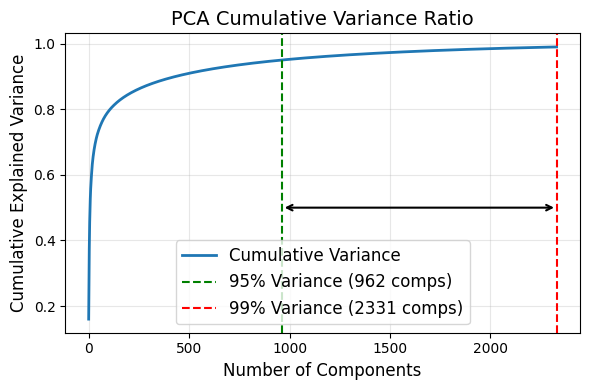

In [96]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(6, 4))


cum_variance = np.cumsum(pca.explained_variance_ratio_)

n_95 = np.argmax(cum_variance >= 0.95) + 1
n_99 = np.argmax(cum_variance >= 0.99) + 1
diff = n_99 - n_95

plt.plot(cum_variance, linewidth=2, label='Cumulative Variance')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('PCA Cumulative Variance Ratio', fontsize=14)
plt.grid(True, alpha=0.3)

plt.axvline(n_95, color='green', linestyle='--', label=f'95% Variance ({n_95} comps)')


plt.axvline(n_99, color='red', linestyle='--', label=f'99% Variance ({n_99} comps)')


plt.annotate(
    '', xy=(n_95, 0.5), xytext=(n_99, 0.5),
    arrowprops=dict(arrowstyle='<->', color='black', lw=1.5)
)

plt.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.savefig("PCA_Explained_Variance_Ratio.png")
plt.show()

#### Gray scale 

In [97]:
from Functions import load_realwaste_dataset
data_dir = "../realwaste-main/RealWaste"
X_train, X_test, y_train, y_test, class_names = load_realwaste_dataset(
    data_dir=data_dir,
    img_size=(128, 128),  
    test_size=0.2,        
    random_state=42,
    grayscale=True  
)

Loading images from dataset...
Loading 461 images from Cardboard...
Loading 411 images from Food Organics...
Loading 420 images from Glass...
Loading 790 images from Metal...
Loading 495 images from Miscellaneous Trash...
Loading 500 images from Paper...
Loading 921 images from Plastic...
Loading 318 images from Textile Trash...
Loading 436 images from Vegetation...

Dataset loaded:
Total images: 4752
Image shape: (128, 128)
Number of classes: 9

Class distribution:
  Cardboard: 461 images
  Food Organics: 411 images
  Glass: 420 images
  Metal: 790 images
  Miscellaneous Trash: 495 images
  Paper: 500 images
  Plastic: 921 images
  Textile Trash: 318 images
  Vegetation: 436 images

Train set: 3801 images
Test set: 951 images

Train set class distribution:
  Cardboard: 369 images (9.7%)
  Food Organics: 329 images (8.7%)
  Glass: 336 images (8.8%)
  Metal: 632 images (16.6%)
  Miscellaneous Trash: 396 images (10.4%)
  Paper: 400 images (10.5%)
  Plastic: 736 images (19.4%)
  Textile T

In [98]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95) 

print("Fitting PCA (this may take a moment)...")
X_aug_pca = pca.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_pca = pca.transform(X_test.reshape(X_test.shape[0], -1))


Fitting PCA (this may take a moment)...


In [99]:
from Functions import augment_training_data
X_aug, y_aug = augment_training_data(X_train,y_train)

training set size:  3801
Starting data augmentation...
Augmentation complete. Final training set size: 22806


In [100]:
print(f"Original Feature Count: {X_train.shape[1]*X_train.shape[2]}")
print(f"Reduced PCA Feature Count: {X_aug_pca.shape[1]}")
X_aug_pca = pca.transform(X_aug.reshape(X_aug.shape[0], -1))
X_test_pca = pca.transform(X_test.reshape(X_test.shape[0], -1))

Original Feature Count: 16384
Reduced PCA Feature Count: 873


In [101]:
from Functions import build_ffnn_model_PCA_optimal
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers

print(f"Building FFNN for input shape: {(X_aug_pca.shape[1],1)}")
# Build Model
model = build_ffnn_model_PCA_optimal((X_aug_pca.shape[1],1), len(class_names))
# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#model.summary()
# Train
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=4, 
    restore_best_weights=True
)
history = model.fit(
    X_aug_pca, y_aug,
    epochs=30,
    batch_size=32,
    validation_data=(X_test_pca, y_test),
    callbacks=[early_stopping]
)
# Evaluate
loss, accuracy = model.evaluate(X_test_pca, y_test)
print(f"\nFinal Test Accuracy: {accuracy*100:.2f}%")

Building FFNN for input shape: (873, 1)
Epoch 1/30


c:\Users\Anton\Documents\UiO Fag\FYS-STK4155 Anvendt dataanalyse og maskinlaring\Eget Arbeid\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.2939 - loss: 2.0450 - val_accuracy: 0.3344 - val_loss: 1.9215
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.3539 - loss: 1.8609 - val_accuracy: 0.3291 - val_loss: 1.9163
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.3672 - loss: 1.8201 - val_accuracy: 0.3407 - val_loss: 1.8985
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.3844 - loss: 1.7924 - val_accuracy: 0.3554 - val_loss: 1.8870
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.3980 - loss: 1.7684 - val_accuracy: 0.3712 - val_loss: 1.8755
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.4104 - loss: 1.7448 - val_accuracy: 0.3954 - val_loss: 1.8651
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.4261 - loss: 1.7193 - val_accuracy: 0.3943 - val_loss: 1.8656
Epoch 8/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.4428 - loss: 1.6903 - val_accurac

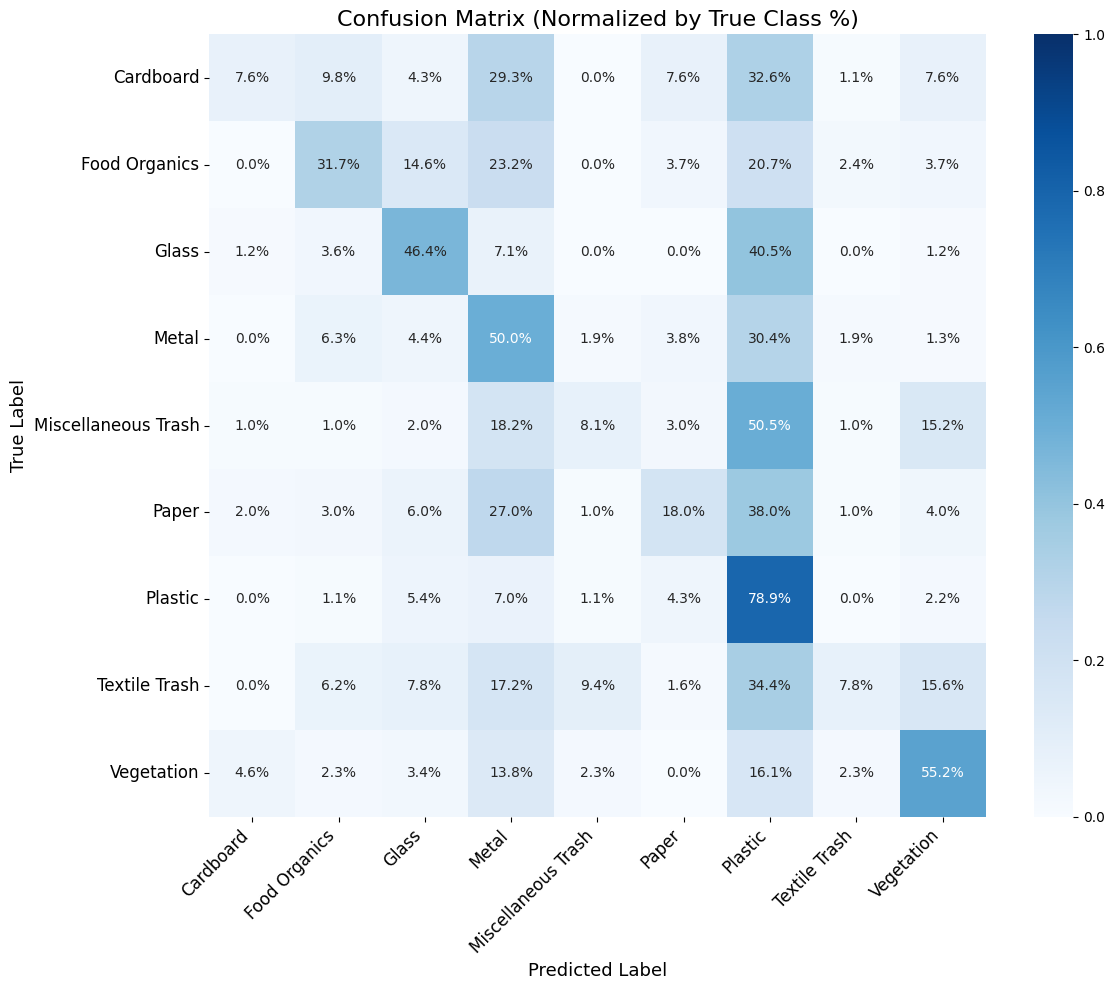

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_probs = model.predict(X_test_pca, verbose=0)
y_pred_classes = np.argmax(y_pred_probs, axis=1)


cm = confusion_matrix(y_test, y_pred_classes)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm_normalized,       # Use the normalized data
    annot=True,          # Show numbers
    fmt='.1%',           # Format as percentage with 1 decimal place (e.g., 85.2%)
    cmap='Blues',        # Color scheme
    xticklabels=class_names,
    yticklabels=class_names,
    vmin=0, vmax=1       
)

plt.xlabel('Predicted Label', fontsize=13)
plt.ylabel('True Label', fontsize=13)
plt.title('Confusion Matrix (Normalized by True Class %)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.savefig("Confusion_Matrix_PCA_FFNN_aug_Gray.png")
plt.show()

### 256x256 Training only 95%

In [103]:
from Functions import load_realwaste_dataset
data_dir = "../realwaste-main/RealWaste"
X_train, X_test, y_train, y_test, class_names = load_realwaste_dataset(
    data_dir=data_dir,
    img_size=(256, 256),  
    test_size=0.2,        
    random_state=42,
    grayscale=False       
)
class_names = [
        'Cardboard', 'Food Organics', 'Glass', 'Metal', 
        'Miscellaneous Trash', 'Paper', 'Plastic', 
        'Textile Trash', 'Vegetation'
]

Loading images from dataset...
Loading 461 images from Cardboard...
Loading 411 images from Food Organics...
Loading 420 images from Glass...
Loading 790 images from Metal...
Loading 495 images from Miscellaneous Trash...
Loading 500 images from Paper...
Loading 921 images from Plastic...
Loading 318 images from Textile Trash...
Loading 436 images from Vegetation...

Dataset loaded:
Total images: 4752
Image shape: (256, 256, 3)
Number of classes: 9

Class distribution:
  Cardboard: 461 images
  Food Organics: 411 images
  Glass: 420 images
  Metal: 790 images
  Miscellaneous Trash: 495 images
  Paper: 500 images
  Plastic: 921 images
  Textile Trash: 318 images
  Vegetation: 436 images

Train set: 3801 images
Test set: 951 images

Train set class distribution:
  Cardboard: 369 images (9.7%)
  Food Organics: 329 images (8.7%)
  Glass: 336 images (8.8%)
  Metal: 632 images (16.6%)
  Miscellaneous Trash: 396 images (10.4%)
  Paper: 400 images (10.5%)
  Plastic: 736 images (19.4%)
  Textil

In [104]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95) 

print("Fitting PCA (this may take a moment)...")
X_aug_pca = pca.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_pca = pca.transform(X_test.reshape(X_test.shape[0], -1))

print(f"Original Feature Count: {X_train.shape[1]*X_train.shape[2]*X_train.shape[3]}")
print(f"Reduced PCA Feature Count: {X_aug_pca.shape[1]}")


Fitting PCA (this may take a moment)...


Original Feature Count: 196608
Reduced PCA Feature Count: 1479


In [105]:
from Functions import augment_training_data
#Creating Chunks to avoid memory issues

X_chunks = np.array_split(X_train, 10)
y_chunks = np.array_split(y_train, 10)

pca_list = []
y_list = []

for X_batch, y_batch in zip(X_chunks, y_chunks):
    # Augment & Transform current batch
    X_aug_batch, y_aug_batch = augment_training_data(X_batch, y_batch)
    X_pca_batch = pca.transform(X_aug_batch.reshape(X_aug_batch.shape[0], -1))
    
    # Store results
    pca_list.append(X_pca_batch)
    y_list.append(y_aug_batch)

# Combine results
X_aug_pca = np.concatenate(pca_list)
y_aug = np.concatenate(y_list)

training set size:  381
Starting data augmentation...
Augmentation complete. Final training set size: 2286
training set size:  380
Starting data augmentation...
Augmentation complete. Final training set size: 2280
training set size:  380
Starting data augmentation...
Augmentation complete. Final training set size: 2280
training set size:  380
Starting data augmentation...
Augmentation complete. Final training set size: 2280
training set size:  380
Starting data augmentation...
Augmentation complete. Final training set size: 2280
training set size:  380
Starting data augmentation...
Augmentation complete. Final training set size: 2280
training set size:  380
Starting data augmentation...
Augmentation complete. Final training set size: 2280
training set size:  380
Starting data augmentation...
Augmentation complete. Final training set size: 2280
training set size:  380
Starting data augmentation...
Augmentation complete. Final training set size: 2280
training set size:  380
Starting data

In [106]:
from Functions import build_ffnn_model_PCA_optimal
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers

print(f"Building FFNN for input shape: {(X_aug_pca.shape[1],1)}")
# Build Model
model = build_ffnn_model_PCA_optimal((X_aug_pca.shape[1],1), len(class_names))
# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#model.summary()
# Train
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=4, 
    restore_best_weights=True
)
history = model.fit(
    X_aug_pca, y_aug,
    epochs=30,
    batch_size=32,
    validation_data=(X_test_pca, y_test),
    callbacks=[early_stopping]
)
# Evaluate
loss, accuracy = model.evaluate(X_test_pca, y_test)
print(f"\nFinal Test Accuracy: {accuracy*100:.2f}%")

Building FFNN for input shape: (1479, 1)


c:\Users\Anton\Documents\UiO Fag\FYS-STK4155 Anvendt dataanalyse og maskinlaring\Eget Arbeid\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.4382 - loss: 1.7564 - val_accuracy: 0.4532 - val_loss: 1.6816
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.5766 - loss: 1.3857 - val_accuracy: 0.4816 - val_loss: 1.7014
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.6600 - loss: 1.2155 - val_accuracy: 0.4995 - val_loss: 1.8204
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.7408 - loss: 1.0667 - val_accuracy: 0.4995 - val_loss: 2.0258
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.8204 - loss: 0.9158 - val_accuracy: 0.4942 - val_loss: 2.3731
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4532 - loss: 1.6816

Final Test Accuracy: 45.32%


In [108]:
def build_ffnn_model_PCA_256(input_shape, num_classes):
    """
    Builds a Feed-Forward Neural Network (Dense layers only).
    """
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),

        # HIDDEN LAYER 1
        # High neuron count needed to capture complex patterns from raw pixels
        layers.Dense(1000, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
        #layers.Dropout(0.4), # Drop 40% to prevent memorization
        #1000,700,500,300
        # HIDDEN LAYER 2
        layers.Dense(700, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
        #layers.Dropout(0.3),

        # HIDDEN LAYER 3
        layers.Dense(500, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
        #layers.Dropout(0.2),
     
        # OUTPUT LAYER
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [109]:
from Functions import build_ffnn_model_PCA_optimal
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers

print(f"Building FFNN for input shape: {(X_aug_pca.shape[1],1)}")
# Build Model
model = build_ffnn_model_PCA_256((X_aug_pca.shape[1],1), len(class_names))
# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    
)
#model.summary()
# Train
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=4, 
    restore_best_weights=True
)
history = model.fit(
    X_aug_pca, y_aug,
    epochs=30,
    batch_size=32,
    validation_data=(X_test_pca, y_test),
    callbacks=[early_stopping]
)
# Evaluate
loss, accuracy = model.evaluate(X_test_pca, y_test)
print(f"\nFinal Test Accuracy: {accuracy*100:.2f}%")

Building FFNN for input shape: (1479, 1)
Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.3894 - loss: 2.1531 - val_accuracy: 0.4175 - val_loss: 1.8892
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.4802 - loss: 1.7577 - val_accuracy: 0.4532 - val_loss: 1.8474
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.5017 - loss: 1.7170 - val_accuracy: 0.4574 - val_loss: 1.8404
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.5139 - loss: 1.6915 - val_accuracy: 0.4595 - val_loss: 1.8339
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.5216 - loss: 1.6708 - val_accuracy: 0.4616 - val_loss: 1.8286
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.5289 - loss: 1.6529 - val_accuracy: 0.4700 - val_loss: 1.8257
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.5366 - loss: 1.6371 - val_accuracy: 0.4711 - val_loss: 1.8242
Epoch 8/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/

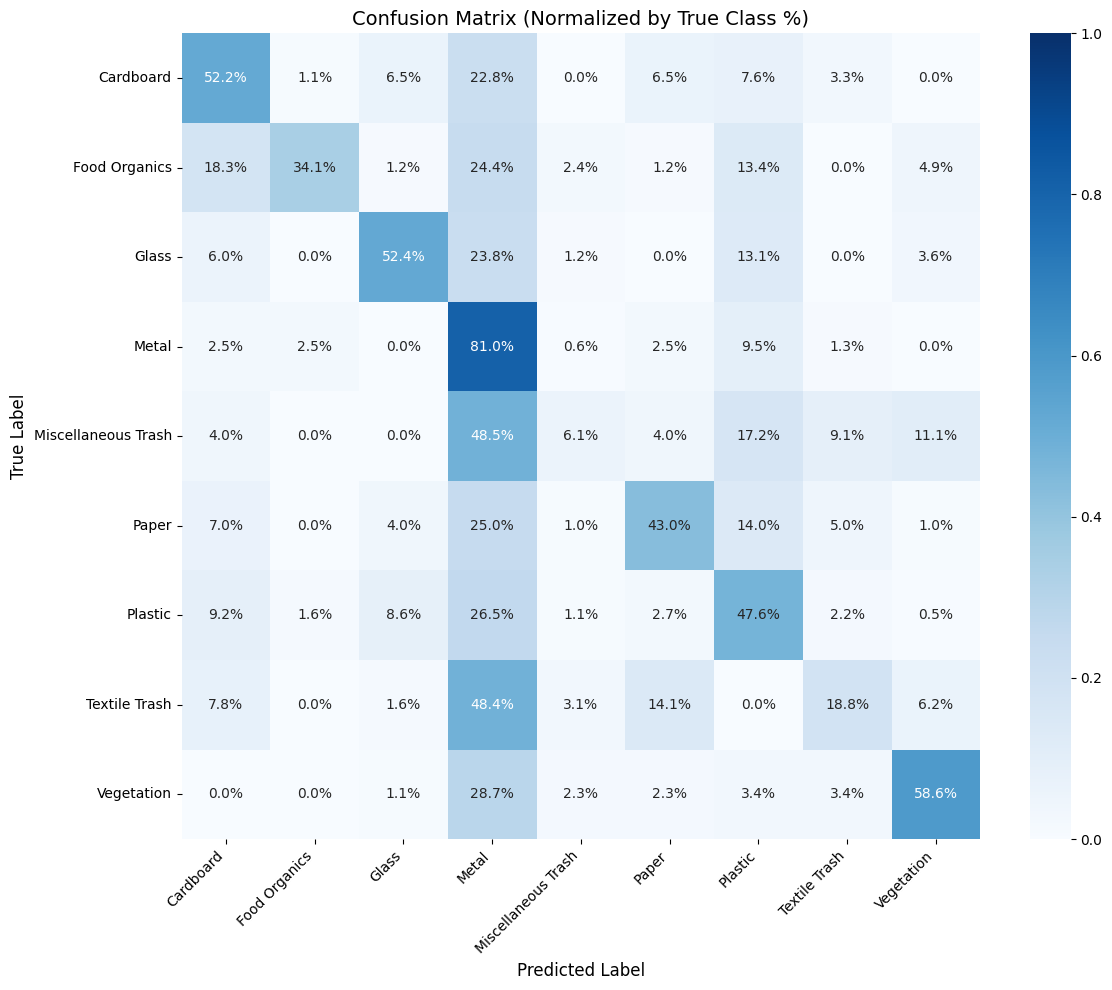

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_probs = model.predict(X_test_pca, verbose=0)
y_pred_classes = np.argmax(y_pred_probs, axis=1)


cm = confusion_matrix(y_test, y_pred_classes)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm_normalized,       # Use the normalized data
    annot=True,          # Show numbers
    fmt='.1%',           # Format as percentage with 1 decimal place (e.g., 85.2%)
    cmap='Blues',        # Color scheme
    xticklabels=class_names,
    yticklabels=class_names,
    vmin=0, vmax=1       
)

plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix (Normalized by True Class %)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("Confusion_Matrix_PCA_FFNN_aug_256.png")
plt.show()

Table including all these results into one

### Best PCA model and where it fails Confusion matrix

Analysis on usefullness at seperating specific garbage from the assembly line.

Image of one of these failures for qualitative analysis, 10 pieces all in seperate images

## Visualization of Training the CNN


In [1]:
from Functions import load_realwaste_dataset
data_dir = "../realwaste-main/RealWaste"
X_train, X_test, y_train, y_test, class_names = load_realwaste_dataset(
    data_dir=data_dir,
    img_size=(128, 128),  
    test_size=0.2,        
    random_state=42,
    grayscale=False
)

Loading images from dataset...
Loading 461 images from Cardboard...
Loading 411 images from Food Organics...
Loading 420 images from Glass...
Loading 790 images from Metal...
Loading 495 images from Miscellaneous Trash...
Loading 500 images from Paper...
Loading 921 images from Plastic...
Loading 318 images from Textile Trash...
Loading 436 images from Vegetation...

Dataset loaded:
Total images: 4752
Image shape: (128, 128, 3)
Number of classes: 9

Class distribution:
  Cardboard: 461 images
  Food Organics: 411 images
  Glass: 420 images
  Metal: 790 images
  Miscellaneous Trash: 495 images
  Paper: 500 images
  Plastic: 921 images
  Textile Trash: 318 images
  Vegetation: 436 images

Train set: 3801 images
Test set: 951 images

Train set class distribution:
  Cardboard: 369 images (9.7%)
  Food Organics: 329 images (8.7%)
  Glass: 336 images (8.8%)
  Metal: 632 images (16.6%)
  Miscellaneous Trash: 396 images (10.4%)
  Paper: 400 images (10.5%)
  Plastic: 736 images (19.4%)
  Textil

In [2]:
from Functions import augment_training_data
X_aug, y_aug = augment_training_data(X_train,y_train)

training set size:  3801
Starting data augmentation...
Augmentation complete. Final training set size: 22806


### Optimal parameter search space

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import models, layers, callbacks

def build_cnn_model(hp):
    """
    Defines the CNN search space based on your successful baseline.
    Now includes Optimizer, Activation, and Kernel Size tuning.
    """
    input_shape = (128, 128, 3)
    num_classes = 9 # RealWaste has 9 classes

    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))


    # --- Shared Hyperparameters ---
    # Try different activation functions (ReLU vs ELU)
    activation_choice = hp.Choice('activation', values=['relu', 'sigmoid'])

    # --- Convolutional Blocks ---
    # Block 1: Tune filters AND Kernel Size
    kernel_size_1 = hp.Choice('conv_1_kernel', values=[3, 5])
    
    model.add(layers.Conv2D(
        filters=hp.Int('conv_1_filters', min_value=32, max_value=64, step=32),
        kernel_size=(kernel_size_1, kernel_size_1),
        padding='same',
        activation=activation_choice
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    # Block 2: Tune filters
    model.add(layers.Conv2D(
        filters=hp.Int('conv_2_filters', min_value=64, max_value=128, step=32),
        kernel_size=(3, 3),
        padding='same',
        activation=activation_choice
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    # Block 3: Tune filters
    model.add(layers.Conv2D(
        filters=hp.Int('conv_3_filters', min_value=128, max_value=256, step=64),
        kernel_size=(3, 3),
        padding='same',
        activation=activation_choice
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    # Block 4: Deep abstraction
    if hp.Boolean('use_block_4', default=True):
        model.add(layers.Conv2D(
            filters=hp.Int('conv_4_filters', min_value=128, max_value=256, step=64),
            kernel_size=(3, 3),
            padding='same',
            activation=activation_choice
        ))
        model.add(layers.MaxPooling2D((2, 2)))

    # --- Classification Head ---
    model.add(layers.Flatten())
    
    # Dense Layer: Tune units
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=128, max_value=512, step=64),
        activation=activation_choice
    ))
    

    if hp.Boolean('extra_dense_layer'):
        # A dropout before the second dense layer to prevent overfitting
        model.add(layers.Dropout(0.25)) 
        model.add(layers.Dense(
            units=hp.Int('dense_units_2', min_value=64, max_value=256, step=32),
            activation=activation_choice
        ))

    # Dropout: Tune rate
    model.add(layers.Dropout(
        rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    ))
    
    model.add(layers.Dense(num_classes, activation='softmax'))


    # Tune Optimizer (Adam vs SGD) and Learning Rate
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'RMSprop'])
    learning_rate = hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])
    
    if optimizer_choice == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    
    model.compile(
        optimizer=opt,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model   

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import models, layers, callbacks


tuner = kt.RandomSearch(
            build_cnn_model,
            objective='val_accuracy',
            max_trials=10,  # Try 10 combinations
            executions_per_trial=1,
            directory='tuner_results', 
            project_name='more_cnn_tuning'
        )
        
tuner.search_space_summary()

print("\nStarting CNN Hyperparameter Search...")
stop_early = callbacks.EarlyStopping(monitor='val_loss', patience=3)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])

# Get best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\n--- Best Hyperparameters Found ---")
print(f"Activation Function: {best_hps.get('activation')}")
print(f"Conv1 Kernel Size: {best_hps.get('conv_1_kernel')}")
print(f"Conv 1 Filters: {best_hps.get('conv_1_filters')}")
print(f"Conv 2 Filters: {best_hps.get('conv_2_filters')}")
print(f"Conv 3 Filters: {best_hps.get('conv_3_filters')}")
print(f"Use Block 4: {best_hps.get('use_block_4')}")
if best_hps.get('use_block_4'):
    print(f"Conv 4 Filters: {best_hps.get('conv_4_filters')}")
print(f"Extra Dense Layer: {best_hps.get('extra_dense_layer')}")
if best_hps.get('extra_dense_layer'):
    print(f"Dense Units 2: {best_hps.get('dense_units_2')}")
print(f"Dense Units: {best_hps.get('dense_units')}")
print(f"Dropout Rate: {best_hps.get('dropout_rate')}")
print(f"Optimizer: {best_hps.get('optimizer')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

### 128 Analysis

In [7]:
from Functions import build_best_cnn_model
from tensorflow.keras import models, layers, callbacks

best_model = build_best_cnn_model()

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',        
    patience=4,                
    restore_best_weights=True  
)

# Train the best model fully on test as validation
print("\nTraining best model fully...")
history = best_model.fit(X_aug, y_aug, epochs=30, validation_data=(X_test, y_test),callbacks=[early_stopping])

# Evaluate
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%, {loss:.4f}")


Training best model fully...
Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 251s 343ms/step - accuracy: 0.4247 - loss: 1.5670 - val_accuracy: 0.5142 - val_loss: 1.3347
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 217s 305ms/step - accuracy: 0.5855 - loss: 1.1473 - val_accuracy: 0.6141 - val_loss: 1.0115
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 219s 307ms/step - accuracy: 0.6616 - loss: 0.9410 - val_accuracy: 0.6866 - val_loss: 0.8891
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 231s 324ms/step - accuracy: 0.7093 - loss: 0.8103 - val_accuracy: 0.6698 - val_loss: 0.9025
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 220s 309ms/step - accuracy: 0.7422 - loss: 0.7116 - val_accuracy: 0.6835 - val_loss: 0.9131
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 196s 275ms/step - accuracy: 0.7710 - loss: 0.6294 - val_accuracy: 0.7256 - val_loss: 0.7739
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 357s 500ms/step - accuracy: 0.7964 - loss: 0.5580 - val_accuracy: 0.7382 - val_loss: 0.7278
Epoch 8/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 204s 2

#### Confusion Matrix

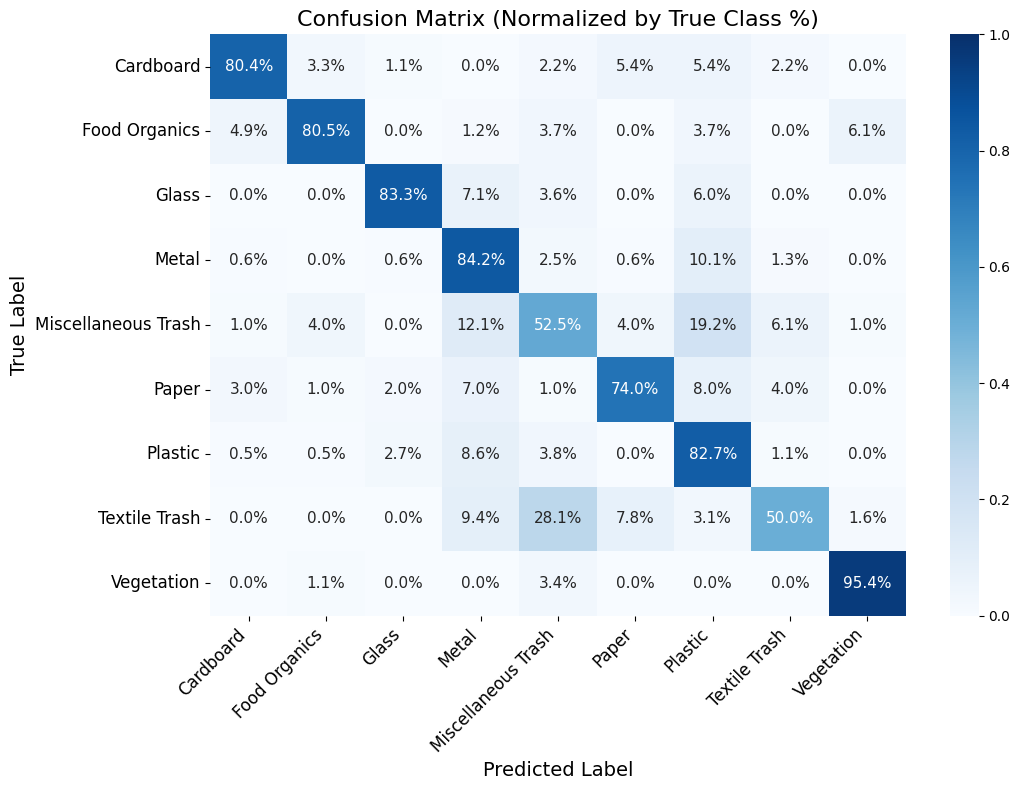

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_probs = best_model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred_probs, axis=1)


cm = confusion_matrix(y_test, y_pred_classes)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(11, 8))
sns.heatmap(
    cm_normalized,       # Use the normalized data
    annot=True,          # Show numbers
    fmt='.1%',           # Format as percentage with 1 decimal place (e.g., 85.2%)
    cmap='Blues',        # Color scheme
    xticklabels=class_names,
    yticklabels=class_names,
    vmin=0, vmax=1
    , annot_kws={"size": 11}  
)

plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix (Normalized by True Class %)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.savefig("Confusion_Matrix_CNN_128_Aug.png")
plt.show()

#### Images Wrongly Categorized

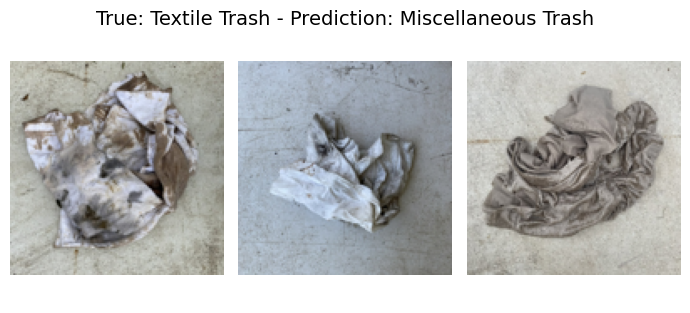

In [7]:
true_label = "Textile Trash"
pred_label = "Miscellaneous Trash"


true_idx = class_names.index(true_label)
pred_idx = class_names.index(pred_label)

misclassified_indices = np.where(
    (y_test == true_idx) & (y_pred_classes == pred_idx)
)[0]

plt.figure(figsize=(7, 3))
plt.title(f"True: {true_label} - Prediction: {pred_label}", fontsize=14)
plt.axis('off')
for i in range(3):
    ax1 = plt.subplot(1, 3, i + 1)
    idx = misclassified_indices[i]
    img = X_test[idx]

    ax1.imshow(img)
    ax1.axis('off')

plt.savefig("Misclassified_Examples_FFNN_PCA_Aug.png")
plt.tight_layout()

plt.show()

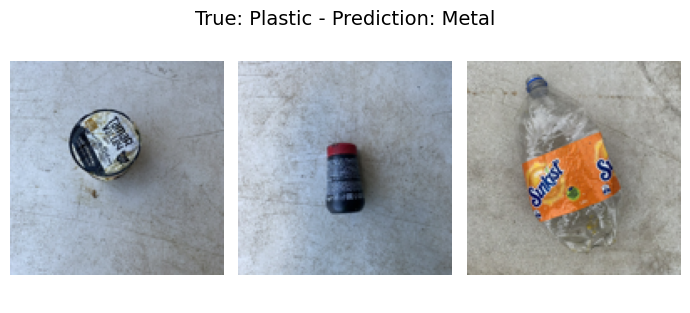

In [ ]:
true_label = "Plastic"
pred_label = "Metal"


true_idx = class_names.index(true_label)
pred_idx = class_names.index(pred_label)

misclassified_indices = np.where(
    (y_test == true_idx) & (y_pred_classes == pred_idx)
)[0]

plt.figure(figsize=(7, 3))
plt.title(f"True: {true_label} - Prediction: {pred_label}", fontsize=14)
plt.axis('off')
for i in range(3):
    ax1 = plt.subplot(1, 3, i + 1)
    idx = misclassified_indices[i]
    img = X_test[idx]

    ax1.imshow(img)
    ax1.axis('off')

plt.savefig("Misclassified_Examples_CNN_Plastic_Metal.png")
plt.tight_layout()

plt.show()

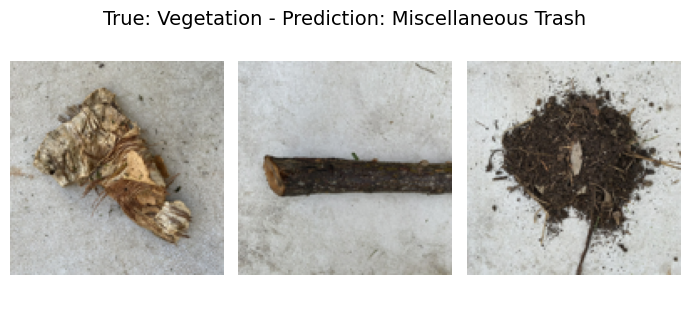

In [9]:
true_label = "Vegetation"
pred_label = "Miscellaneous Trash"


true_idx = class_names.index(true_label)
pred_idx = class_names.index(pred_label)

misclassified_indices = np.where(
    (y_test == true_idx) & (y_pred_classes == pred_idx)
)[0]

plt.figure(figsize=(7, 3))
plt.title(f"True: {true_label} - Prediction: {pred_label}", fontsize=14)
plt.axis('off')
for i in range(3):
    ax1 = plt.subplot(1, 3, i + 1)
    idx = misclassified_indices[i]
    img = X_test[idx]

    ax1.imshow(img)
    ax1.axis('off')

plt.savefig("Misclassified_Examples_FFNN_PCA_Aug.png")
plt.tight_layout()

plt.show()

#### Training plot

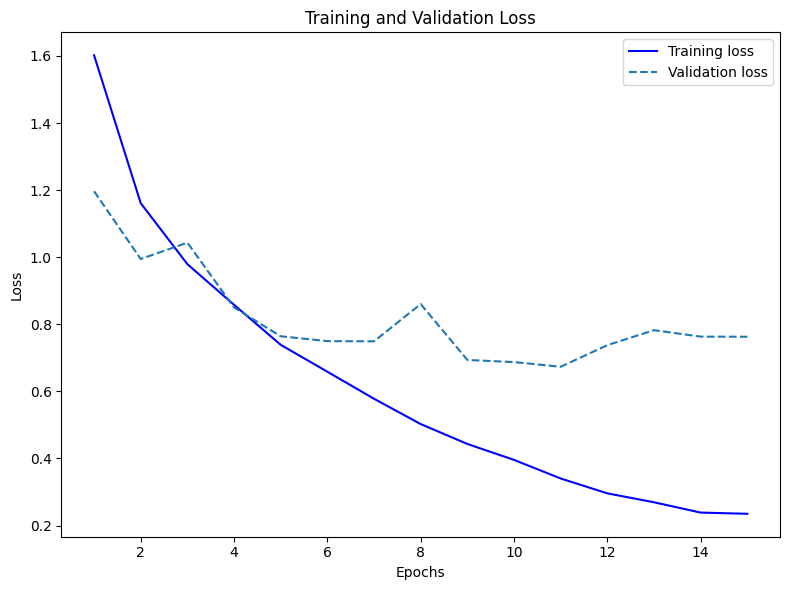

In [10]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Plot training loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
# Plot validation loss
plt.plot(epochs, val_loss, '--', label='Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig("Training_plot_optimal_CNN_128_aug.png")
plt.show()

#### Running the model on the smaller set

In [11]:
# Training the CNN
from Functions import build_best_cnn_model
from tensorflow.keras import models, layers, callbacks

best_model = build_best_cnn_model()

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',        
    patience=4,                
    restore_best_weights=True  
)

# Train the best model fully on test as validation
print("\nTraining best model fully...")
history = best_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test),callbacks=[early_stopping])

# Evaluate
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%, Loss: {loss:.4f}")


Training best model fully...
Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 43s 345ms/step - accuracy: 0.2015 - loss: 2.1153 - val_accuracy: 0.2944 - val_loss: 1.8789
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 39s 328ms/step - accuracy: 0.3312 - loss: 1.7974 - val_accuracy: 0.4669 - val_loss: 1.6225
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 39s 329ms/step - accuracy: 0.4236 - loss: 1.5975 - val_accuracy: 0.4963 - val_loss: 1.4068
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 41s 341ms/step - accuracy: 0.4993 - loss: 1.3957 - val_accuracy: 0.5468 - val_loss: 1.2942
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 43s 361ms/step - accuracy: 0.5385 - loss: 1.2428 - val_accuracy: 0.5573 - val_loss: 1.1874
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 38s 322ms/step - accuracy: 0.5772 - loss: 1.1593 - val_accuracy: 0.6057 - val_loss: 1.1256
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 42s 355ms/step - accuracy: 0.6062 - loss: 1.1038 - val_accuracy: 0.5542 - val_loss: 1.2495
Epoch 8/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 40s 338ms/ste

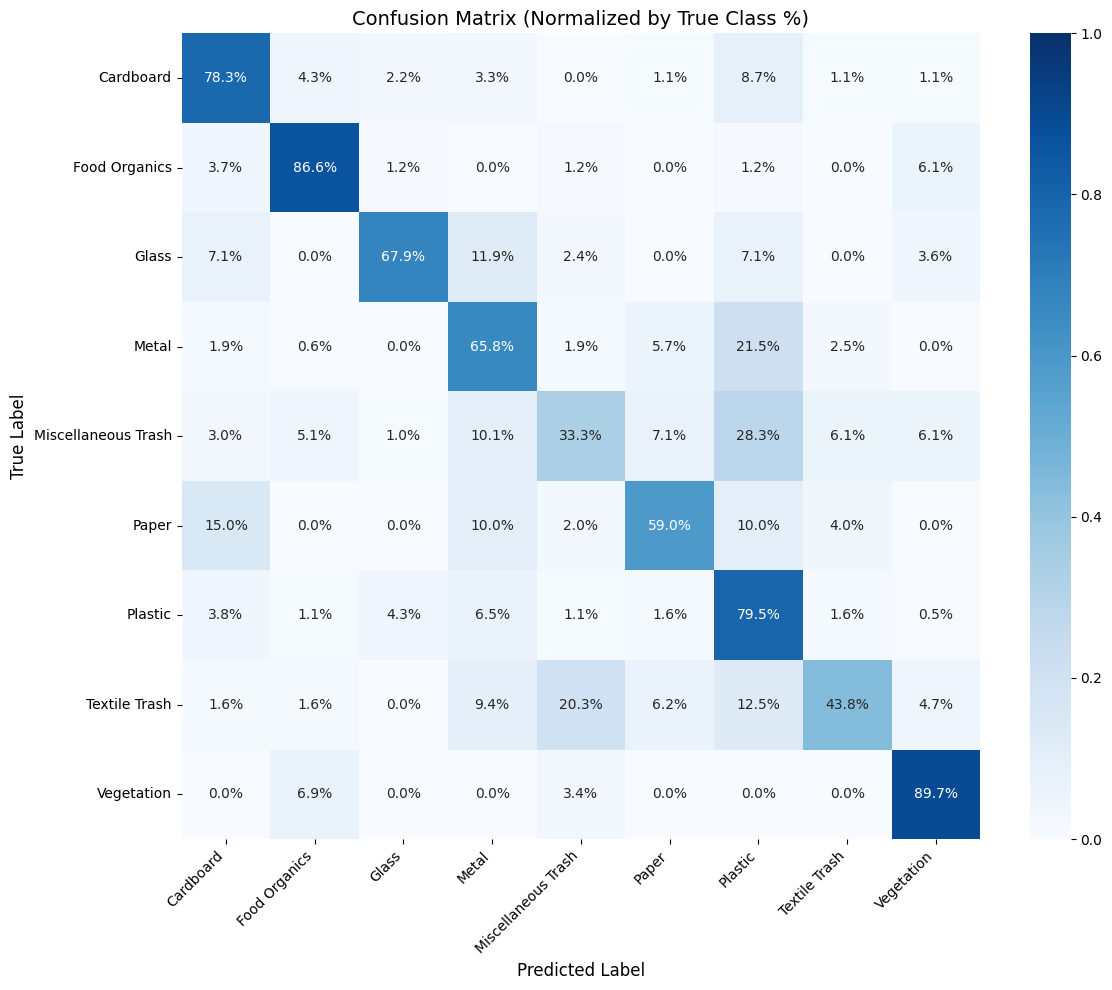

In [14]:
#Ploting the Confusion Matrix for CNN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_probs = best_model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred_probs, axis=1)


cm = confusion_matrix(y_test, y_pred_classes)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm_normalized,       # Use the normalized data
    annot=True,          # Show numbers
    fmt='.1%',           # Format as percentage with 1 decimal place (e.g., 85.2%)
    cmap='Blues',        # Color scheme
    xticklabels=class_names,
    yticklabels=class_names,
    vmin=0, vmax=1       
)

plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix (Normalized by True Class %)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("Confusion_Matrix_CNN_128_Optimal_small.png")
plt.show()

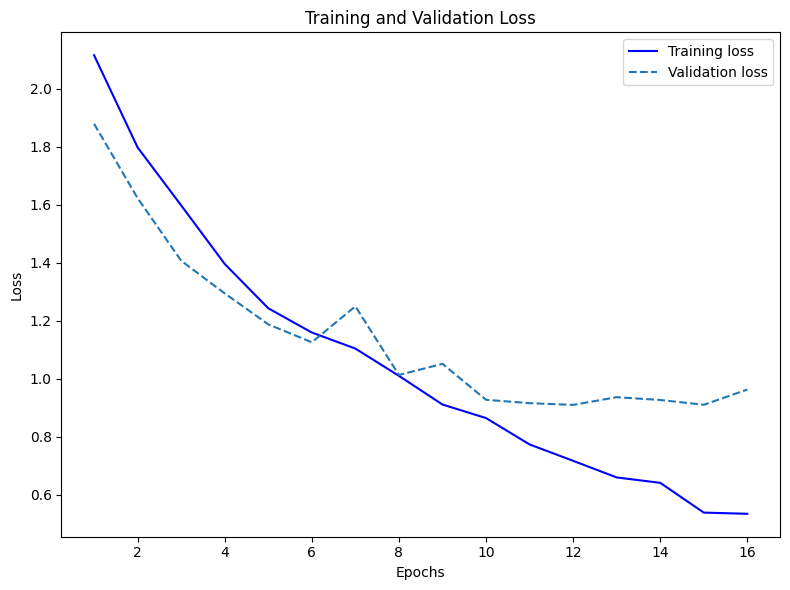

In [15]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Plot training loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
# Plot validation loss
plt.plot(epochs, val_loss, '--', label='Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig("Training_plot_optimal_CNN_128_small.png")
plt.show()

#### Testing on smaller images 64x64

In [16]:
#Importing dataset and augmenting for grayscale images
from Functions import load_realwaste_dataset,augment_training_data
data_dir = "../realwaste-main/RealWaste"
X_train, X_test, y_train, y_test, class_names = load_realwaste_dataset(
    data_dir=data_dir,
    img_size=(64, 64),  
    test_size=0.2,        
    random_state=42,
    grayscale=False
)
X_aug, y_aug = augment_training_data(X_train,y_train)

Loading images from dataset...
Loading 461 images from Cardboard...


Loading 411 images from Food Organics...
Loading 420 images from Glass...
Loading 790 images from Metal...
Loading 495 images from Miscellaneous Trash...
Loading 500 images from Paper...
Loading 921 images from Plastic...
Loading 318 images from Textile Trash...
Loading 436 images from Vegetation...

Dataset loaded:
Total images: 4752
Image shape: (64, 64, 3)
Number of classes: 9

Class distribution:
  Cardboard: 461 images
  Food Organics: 411 images
  Glass: 420 images
  Metal: 790 images
  Miscellaneous Trash: 495 images
  Paper: 500 images
  Plastic: 921 images
  Textile Trash: 318 images
  Vegetation: 436 images

Train set: 3801 images
Test set: 951 images

Train set class distribution:
  Cardboard: 369 images (9.7%)
  Food Organics: 329 images (8.7%)
  Glass: 336 images (8.8%)
  Metal: 632 images (16.6%)
  Miscellaneous Trash: 396 images (10.4%)
  Paper: 400 images (10.5%)
  Plastic: 736 images (19.4%)
  Textile Trash: 254 images (6.7%)
  Vegetation: 349 images (9.2%)
training se

In [17]:
# Training of Best CNN Model
from Functions import build_best_cnn_model
from tensorflow.keras import models, layers, callbacks

best_model = build_best_cnn_model(input_shape=(64,64,3))

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',        
    patience=4,                
    restore_best_weights=True  
)

# Train the best model fully on test as validation
print("\nTraining best model fully...")
history = best_model.fit(X_aug, y_aug, epochs=30, validation_data=(X_test, y_test),callbacks=[early_stopping])

# Evaluate
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%, Loss: {loss:.4f}")


Training best model fully...
Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 58s 79ms/step - accuracy: 0.3768 - loss: 1.7074 - val_accuracy: 0.5089 - val_loss: 1.3597
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 56s 78ms/step - accuracy: 0.5318 - loss: 1.2921 - val_accuracy: 0.5720 - val_loss: 1.1782
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 58s 81ms/step - accuracy: 0.5945 - loss: 1.1269 - val_accuracy: 0.5668 - val_loss: 1.2051
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 57s 79ms/step - accuracy: 0.6366 - loss: 1.0006 - val_accuracy: 0.6425 - val_loss: 0.9616
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 57s 80ms/step - accuracy: 0.6773 - loss: 0.8946 - val_accuracy: 0.6572 - val_loss: 0.9561
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 57s 80ms/step - accuracy: 0.7156 - loss: 0.7883 - val_accuracy: 0.6719 - val_loss: 0.8918
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 61s 85ms/step - accuracy: 0.7421 - loss: 0.7080 - val_accuracy: 0.6982 - val_loss: 0.8433
Epoch 8/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 61s 85ms/step - accu

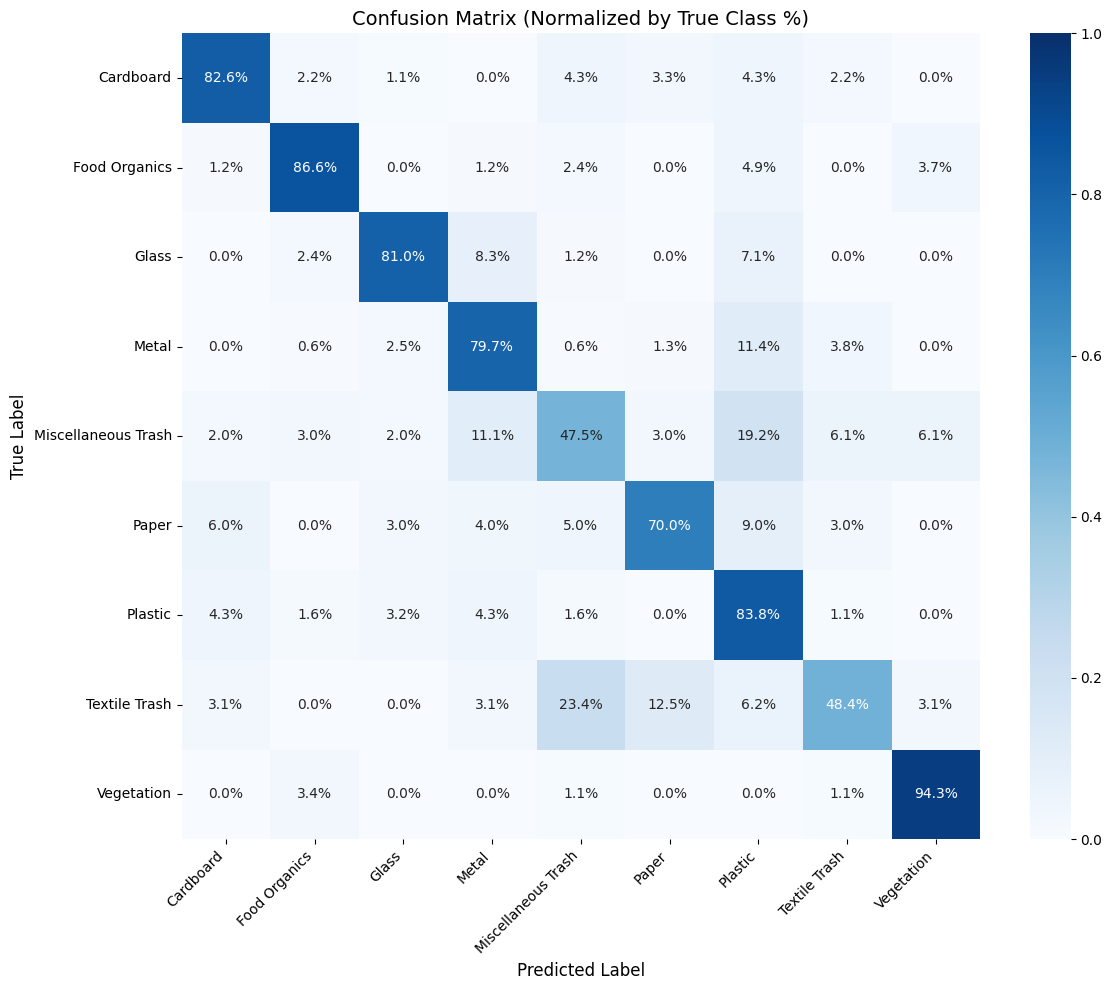

In [20]:
#Ploting the Confusion Matrix for CNN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_probs = best_model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred_probs, axis=1)


cm = confusion_matrix(y_test, y_pred_classes)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm_normalized,       # Use the normalized data
    annot=True,          # Show numbers
    fmt='.1%',           # Format as percentage with 1 decimal place (e.g., 85.2%)
    cmap='Blues',        # Color scheme
    xticklabels=class_names,
    yticklabels=class_names,
    vmin=0, vmax=1       
)

plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix (Normalized by True Class %)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("Confusion_Matrix_CNN_Optimal_64_Aug.png")
plt.show()

### Grayscale Learning

In [46]:
#Importing dataset and augmenting for grayscale images
from Functions import load_realwaste_dataset,augment_training_data
data_dir = "../realwaste-main/RealWaste"
X_train, X_test, y_train, y_test, class_names = load_realwaste_dataset(
    data_dir=data_dir,
    img_size=(128, 128),  
    test_size=0.2,        
    random_state=42,
    grayscale=True
)
X_aug, y_aug = augment_training_data(X_train,y_train)

Loading images from dataset...
Loading 461 images from Cardboard...
Loading 411 images from Food Organics...
Loading 420 images from Glass...
Loading 790 images from Metal...
Loading 495 images from Miscellaneous Trash...
Loading 500 images from Paper...
Loading 921 images from Plastic...
Loading 318 images from Textile Trash...
Loading 436 images from Vegetation...

Dataset loaded:
Total images: 4752
Image shape: (128, 128)
Number of classes: 9

Class distribution:
  Cardboard: 461 images
  Food Organics: 411 images
  Glass: 420 images
  Metal: 790 images
  Miscellaneous Trash: 495 images
  Paper: 500 images
  Plastic: 921 images
  Textile Trash: 318 images
  Vegetation: 436 images

Train set: 3801 images
Test set: 951 images

Train set class distribution:
  Cardboard: 369 images (9.7%)
  Food Organics: 329 images (8.7%)
  Glass: 336 images (8.8%)
  Metal: 632 images (16.6%)
  Miscellaneous Trash: 396 images (10.4%)
  Paper: 400 images (10.5%)
  Plastic: 736 images (19.4%)
  Textile T

In [47]:
# Training of Best CNN Model
from Functions import build_best_cnn_model
from tensorflow.keras import models, layers, callbacks

best_model = build_best_cnn_model(input_shape=(128,128,1))

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',        
    patience=4,                
    restore_best_weights=True  
)

# Train the best model fully on test as validation
print("\nTraining best model fully...")
history = best_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test),callbacks=[early_stopping])

# Evaluate
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%, Loss: {loss:.4f}")


Training best model fully...
Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 39s 316ms/step - accuracy: 0.2005 - loss: 2.1532 - val_accuracy: 0.2902 - val_loss: 2.0450
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 37s 306ms/step - accuracy: 0.2907 - loss: 1.9572 - val_accuracy: 0.3228 - val_loss: 1.8628
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 37s 313ms/step - accuracy: 0.3312 - loss: 1.7970 - val_accuracy: 0.3838 - val_loss: 1.6312
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.4099 - loss: 1.6121 - val_accuracy: 0.4227 - val_loss: 1.5118
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 35s 293ms/step - accuracy: 0.4707 - loss: 1.4740 - val_accuracy: 0.4890 - val_loss: 1.4286
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 32s 268ms/step - accuracy: 0.5159 - loss: 1.3614 - val_accuracy: 0.5205 - val_loss: 1.3495
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 264ms/step - accuracy: 0.5654 - loss: 1.2128 - val_accuracy: 0.5741 - val_loss: 1.2119
Epoch 8/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 36s 299ms/ste

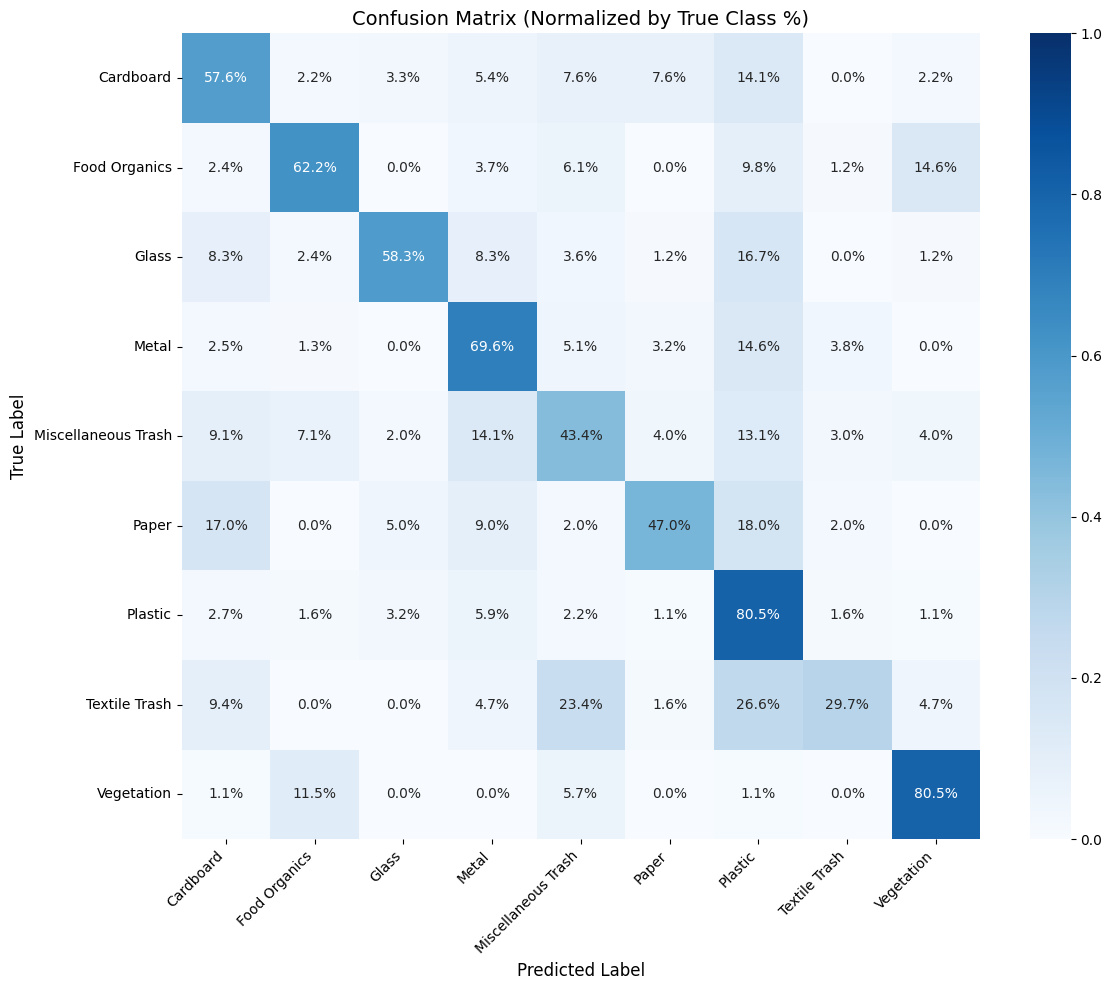

In [48]:
# Confusion matrix for grayscale CNN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_probs = best_model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred_probs, axis=1)


cm = confusion_matrix(y_test, y_pred_classes)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm_normalized,       # Use the normalized data
    annot=True,          # Show numbers
    fmt='.1%',           # Format as percentage with 1 decimal place (e.g., 85.2%)
    cmap='Blues',        # Color scheme
    xticklabels=class_names,
    yticklabels=class_names,
    vmin=0, vmax=1       
)

plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix (Normalized by True Class %)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("Confusion_Matrix_CNN_128_Optimal_Gray_Aug.png")
plt.show()

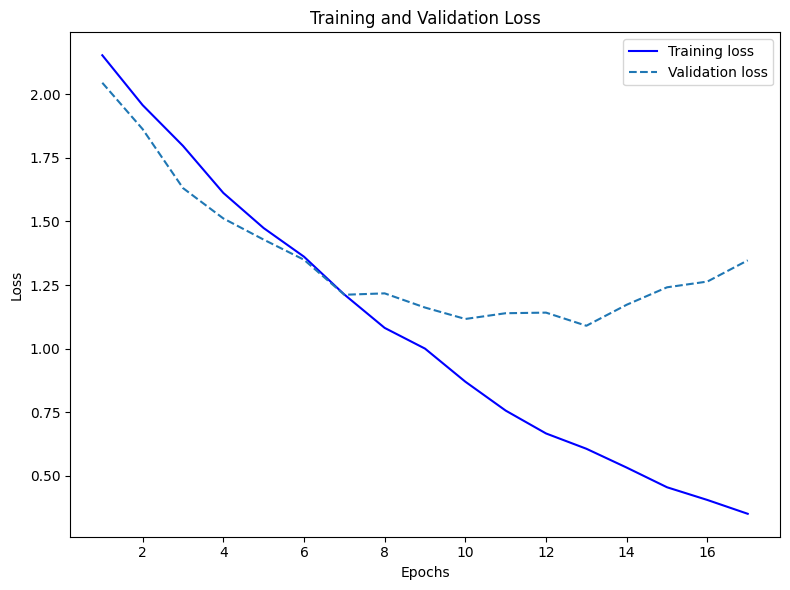

In [49]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Plot training loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
# Plot validation loss
plt.plot(epochs, val_loss, '--', label='Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig("Training_plot_optimal_CNN_128_Gray.png")
plt.show()

## Comparison of FFNN vs CNN on 128x128
Time used and the learning rate,
a critical discussion on why it is.

Found 46 images correctly classified by CNN but missed by PCA.


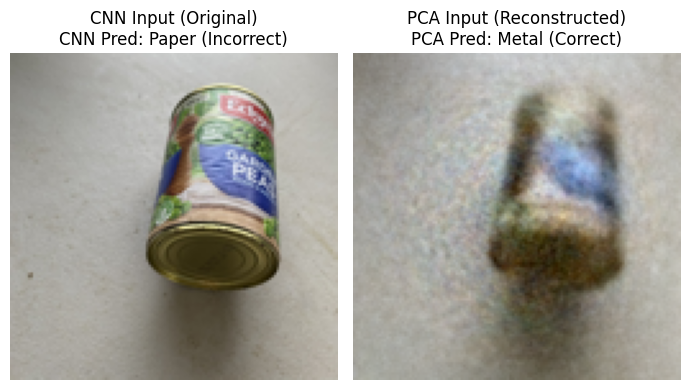

In [28]:
import matplotlib.pyplot as plt
import numpy as np


cnn_probs = best_model.predict(X_test, verbose=0)
y_pred_cnn = np.argmax(cnn_probs, axis=1)


pca_probs = model.predict(X_test_pca, verbose=0)
y_pred_pca = np.argmax(pca_probs, axis=1)



interest_indices = np.where(
    (y_pred_cnn != y_test) & (y_pred_pca == y_test)
)[0]

print(f"Found {len(interest_indices)} images correctly classified by CNN but missed by PCA.")


if len(interest_indices) > 0:
    idx = interest_indices[28] 
    
    img_orig = X_test[idx]
    true_label = class_names[y_test[idx]]
    cnn_pred = class_names[y_pred_cnn[idx]]
    pca_pred = class_names[y_pred_pca[idx]]
    
    # Generate PCA Reconstruction for visualization
    # (What the PCA model "sees")
    img_pca_flat = pca.transform(img_orig.reshape(1, -1))
    img_pca_recon = pca.inverse_transform(img_pca_flat).reshape(img_orig.shape)
    img_pca_recon = np.clip(img_pca_recon, 0, 1) # Clip to valid range

    # Create Plot
    fig, axes = plt.subplots(1, 2, figsize=(7, 5))
    #plt.suptitle(f"CNN vs. PCA Comparison (Test Index {idx})", fontsize=16)

    # Left: Original (CNN Input)
    ax = axes[0]
    if img_orig.ndim == 3 and img_orig.shape[-1] == 1:
        ax.imshow(img_orig.squeeze(), cmap='gray')
    else:
        ax.imshow(img_orig)
    ax.set_title(f"CNN Input (Original)\nCNN Pred: {cnn_pred} (Incorrect)", 
                 fontsize=12, )
    ax.axis('off')

    # Right: PCA Reconstruction (PCA Input Representation)
    ax = axes[1]
    if img_pca_recon.ndim == 3 and img_pca_recon.shape[-1] == 1:
        ax.imshow(img_pca_recon.squeeze(), cmap='gray')
    else:
        ax.imshow(img_pca_recon)
    ax.set_title(f"PCA Input (Reconstructed)\nPCA Pred: {pca_pred} (Correct)", 
                 fontsize=12, )
    ax.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images")

### 